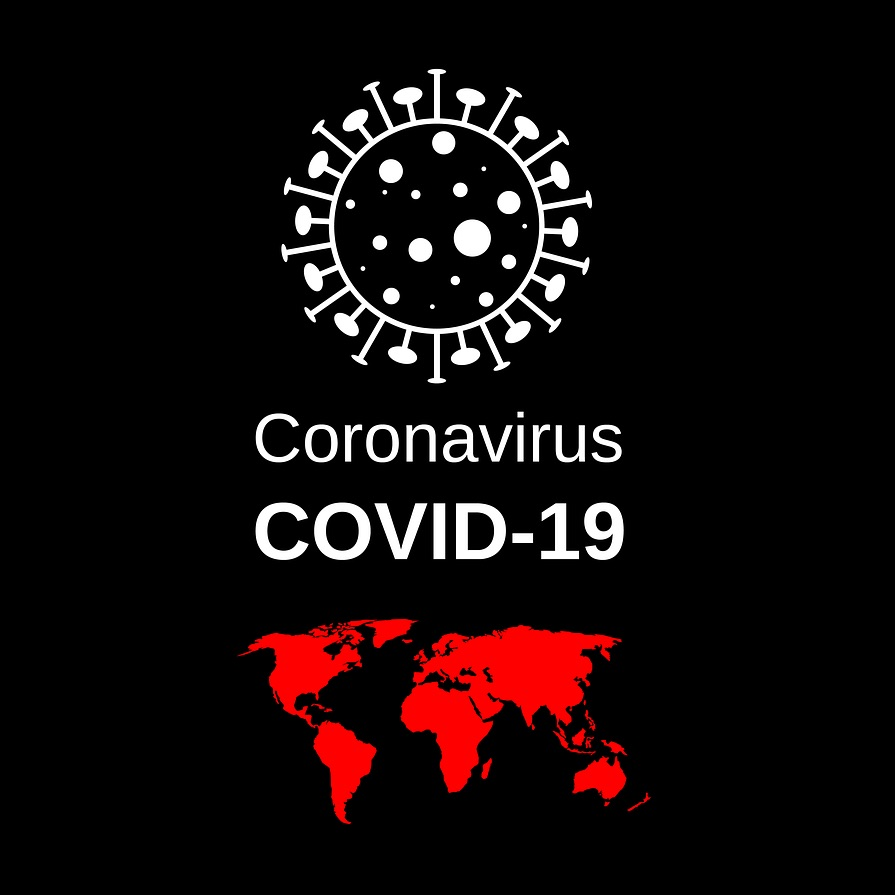

**The 2019–20 novel coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS‑CoV‑2). The outbreak was identified in Wuhan, China, in December 2019. The World Health Organization declared the outbreak to be a Public Health Emergency of International Concern on 30 January 2020, and recognised it as a pandemic on 11 March 2020. As of 22 April 2020, more than 2.58 million cases of COVID-19 have been reported in 185 countries and territories, resulting in more than 178,000 deaths. More than 693,000 people have recovered, although there may be a possibility of relapse or reinfection.**

**The first case of the 2019–20 coronavirus pandemic in India was reported on 30 January 2020. Experts suggest the number of infections could be much higher as India's testing rates are among the lowest in the world. The infection rate of COVID-19 in India is reported to be 1.7, significantly lower than in the worst affected countries.
On 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India. On 14 April, the prime minister extended the ongoing nationwide lockdown till 3rd of May**

**IMPORTS**

In [ ]:
# DATA HANDLING 
import pandas as pd
import numpy as np
import datetime
import operator
from math import pi

#VISUALISATION
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import folium
from plotly.offline import init_notebook_mode,iplot
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.express as ex
from bokeh.models import BoxAnnotation, LabelSet
from bokeh.layouts import row,column
from bokeh.palettes import Spectral4
from bokeh.plotting import figure,show, output_notebook, ColumnDataSource
output_notebook()
from IPython.core.display import HTML
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# LEARNING MODELS
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split, train_test_split,RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

import os


In [ ]:
def parser(x):
    return datetime.datetime.strptime(x,'%d-%m-%Y')

data_frame =pd.read_csv( '../input/covid19india/covid_19_india.csv')
data_frame_horizontal = pd.read_csv('../input/covid19india/covid-hori.csv')
df_census =  pd.read_csv('../input/covid19india/population_india_census2011.csv')
df_labs = pd.read_csv('../input/covid19india/ICMRTestingLabs.csv')
df_age = pd.read_csv('../input/covid19india/AgeGroupDetails.csv')
df_hospitals = pd.read_csv('../input/covid19india/HospitalBedsIndia.csv')
df_MSE = pd.DataFrame()
df_future_predictions = pd.DataFrame()
arima_df = pd.read_csv('../input/tempted/new vertical.csv',index_col=[0],parse_dates=[0],date_parser=parser)
world_df = pd.read_csv('../input/tempted/covid_19_clean_complete.csv')

data_frame_vertical = pd.read_csv('../input/tempted/new vertical.csv',index_col=[0],parse_dates=[0],date_parser=parser)
world_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-21-2020.csv')
time_series_df=pd.read_csv('../input/tempted/new vertical.csv')

table = data_frame.copy()
table.groupby('Date')['Confirmed','Deaths','Cured'].sum().reset_index()

In [ ]:
world_df.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()
world_df['Active'] = world_df['Confirmed']- world_df['Deaths'] - world_df['Recovered']
world_df.groupby('Country/Region').max().reset_index()
world_df['Mortality Rate'] = (world_df['Deaths']/world_df['Confirmed'].sum())*100
world_df['Recovery Rate'] = (world_df['Recovered']/world_df['Confirmed'].sum())*100
unique_countries =  list(world_data['Country_Region'].unique())


In [ ]:
table['Active'] = table['Confirmed'] - table['Deaths'] - table['Cured']

current_date = table['Date'] > '2020-02-17'
state_wise_cases = table.groupby('State/UnionTerritory').max().reset_index()


state_wise_cases =  state_wise_cases[state_wise_cases.Active!=77]
state_wise_cases =  state_wise_cases[state_wise_cases.Confirmed!=0]
state_wise_cases['Mortality Rate']= (state_wise_cases['Deaths']/state_wise_cases['Confirmed'].sum())*100
state_wise_cases['Recovery Rate']= (state_wise_cases['Cured']/state_wise_cases['Confirmed'].sum())*100


In [ ]:
total_cases=[]
total_deaths=[]
total_cured=[]
total_active=[]

j=0
dates = data_frame_horizontal.keys()
for i in dates:
    total_cases.append(data_frame_horizontal.iat[0,j])
    total_deaths.append(data_frame_horizontal.iat[1,j])
    total_cured.append(data_frame_horizontal.iat[2,j])
    total_active.append(data_frame_horizontal.iat[3,j])
    
    j+=1


days_since_1_30 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
india_total_cases = np.array(total_cases).reshape(-1, 1)
upcoming_days = 10
future_forecast = np.array([i for i in range(len(dates)+upcoming_days)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

start = '1/30/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [ ]:
confirmed_world = []
death_world = [] 
active_world = []
recovery_world = []
mortality_world = [] 

no_cases = []
for i in unique_countries:
    cases = world_data[world_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_world.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries,confirmed_world), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_world[i] = world_data[world_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_world.append(world_data[world_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_world.append(world_data[world_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_world.append(confirmed_world[i] - death_world[i] - recovery_world[i])
    mortality_world.append(death_world[i]/confirmed_world[i])

# VISUALISATION

**ANIMATION FOR WORLD CONFIRMED CASES**

In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2042788" data-url="https://flo.uri.sh/visualisation/2042788/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

**COMPLE WORLD STATISTICS**

In [ ]:

country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_world,
                          'Number of Deaths': death_world, 'Number of Recoveries' : recovery_world, 
                          'Number of Active Cases' : active_world,
                          'Mortality Rate': mortality_world})
country_df.style.background_gradient(cmap=cm.get_cmap('Spectral'))

# VISUAL ANALYSIS SPECIFIC TO INDIA

**STATE WISE COMPLETE STATISTICS**

In [ ]:
# TABLE REPRESENTATION
temp_df= state_wise_cases.sort_values('Confirmed', ascending=False)
temp_df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Sno', 'Date','Time'], axis=1, inplace=True) 
temp_df.style.background_gradient(cmap='Purples', subset='Confirmed')\
    .background_gradient(cmap='Greens', subset='Deaths')\
    .background_gradient(cmap='BuPu', subset='Cured')\
    .background_gradient(cmap='Reds', subset='Active')\
    .background_gradient(cmap='PuBuGn', subset='Mortality Rate')\
    .background_gradient(cmap='YlOrBr', subset='Recovery Rate') 

In [ ]:
print("Total Confirmed cases: ",state_wise_cases['Confirmed'].sum())
print("Total Number of Deaths: ", state_wise_cases['Deaths'].sum())
print("Total Number of patients Recovered: ", state_wise_cases['Cured'].sum())
print("Total Number of Active Cases: ", state_wise_cases['Active'].sum())

**CONFIRMED CASES STATE/UNION-TERRITORY WISE**

In [ ]:
# BARPLOTS FOR STATE WISE REPRESENTATION
fig = px.bar(state_wise_cases.sort_values('Confirmed', ascending= False).sort_values('Confirmed', ascending=False), 
             color='State/UnionTerritory',
             x="Confirmed", y="State/UnionTerritory", 
             title='Total Confirmed Cases', 
             text='Confirmed', 
             orientation='h', 
             width=800, height=1000,color_discrete_sequence = ex.colors.cyclical.Phase)
fig.update_layout(plot_bgcolor='rgb(275, 260, 265)')
#fig.update_traces(marker_color='#0077ff', opacity=0.8, textposition='inside')

#fig.update_layout(template = 'plotly_white')
fig.show()


In [ ]:
fig = px.bar(state_wise_cases.sort_values('Deaths', ascending= False).sort_values('Deaths', ascending=False), 
             color='State/UnionTerritory',
             x="Deaths", y="State/UnionTerritory", 
             title='Fatalities For Different States', 
             text='Deaths', 
             orientation='h', 
             width=800, height=1000,color_discrete_sequence = ex.colors.cyclical.Phase)
fig.update_layout(plot_bgcolor='rgb(280, 270, 275)')
fig.show()

In [ ]:
fig = px.bar(state_wise_cases.sort_values('Cured', ascending= False).sort_values('Cured', ascending=False), 
             color='State/UnionTerritory',
             x="Cured", y="State/UnionTerritory", 
             title='Patients Recovered', 
             text='Cured', 
             orientation='h', 
             width=800, height=1000,color_discrete_sequence = ex.colors.cyclical.Phase)
fig.update_layout(plot_bgcolor='rgb(275, 260, 265)')
fig.show()

**RECOVERY RATE OF DIFFERENT STATES**

In [ ]:
# BARPLOT
fig = px.bar(state_wise_cases.sort_values('Recovery Rate', ascending= False).sort_values('Recovery Rate', ascending=False), 
             color='State/UnionTerritory',
             x="Recovery Rate", y="State/UnionTerritory", 
             title='Recovery Rate For Different States', 
             text='Recovery Rate', 
             orientation='h', 
             width=800, height=1000,color_discrete_sequence = ex.colors.cyclical.Phase)
fig.update_layout(plot_bgcolor='rgb(275, 260, 265)')
fig.show()

**SLIDER LINE PLOT FOR CONFIRMED CASES**
*(Slide the bar to view a number of cases for each day.)*

In [ ]:
len(total_cases)
s = '#442288'
h = '#6CA2EA'
e = '#B5D33D'
m = '#FED23F'
c = '#EB7D5B'
sec = [s, e, c]
dates = future_forecast_dates[0:84]
fig = px.line(x=dates, y=total_cases, 
             title='No. of cases',
             color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

STATS BEHAVIOUR w.r.t TO DATES

In [ ]:
# LINE PLOT 
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
x=[20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
plt.plot(adjusted_dates, india_total_cases,color='r',marker='*')
plt.plot(adjusted_dates,total_active,marker='^')
plt.plot(adjusted_dates, total_cured,marker='+')
plt.plot(adjusted_dates,total_deaths)
plt.title('Confirmed Cases over Time', size=30)
plt.xlabel('Since 1/30/2020', size=30)
plt.ylabel('No.of Cases', size=30)
plt.legend(['Confirmed Cases', 'Active Cases','Deaths','Cured'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
# HORIZONTAL BAR PLOT
plt.figure(figsize=(16, 9))
plt.barh('Confirmed Cases',state_wise_cases['Confirmed'].sum())
plt.barh('Active Cases', state_wise_cases['Active'].sum())
plt.barh('Deaths',state_wise_cases['Deaths'].sum())
plt.barh('Cured',state_wise_cases['Cured'].sum())
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
df_india=temp_df.copy()
lat = {'Delhi':28.7041,
       'Haryana':29.0588,
       'Kerala':10.8505,
       'Rajasthan':27.0238,
       'Telengana':18.1124,
       'Uttar Pradesh':26.8467,
       'Ladakh':34.2996,
       'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782,
       'Punjab':31.1471,
       'Karnataka':15.3173,
       'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 
       'Odisha':20.9517, 
       'Uttarakhand':30.0668, 
       'West Bengal':22.9868, 
       'Puducherry': 11.9416, 
       'Chandigarh': 30.7333, 
       'Chhattisgarh':21.2787, 
       'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 
       'Madhya Pradesh': 22.9734, 
       'Bihar': 25.0961, 
       'Manipur':24.6637,
       'Mizoram':23.1645,
        'Goa':15.2993,
     'Andaman and Nicobar Islands':11.7401,
      "Jharkhand" : 23.6102,
      'Arunachal Pradesh': 28.2180,
      'Assam' : 26.2006,
      'Tripura':23.9408,
      'Meghalaya':25.4670,
      'Nagaland':26.1584}

long = {'Delhi':77.1025,
        'Haryana':76.0856,
        'Kerala':76.2711,
        'Rajasthan':74.2179,
        'Telengana':79.0193,
        'Uttar Pradesh':80.9462,
        'Ladakh':78.2932,
        'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762,
        'Punjab':75.3412,
        'Karnataka':75.7139,
        'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 
        'Odisha':85.0985, 
        'Uttarakhand':79.0193, 
        'West Bengal':87.8550, 
        'Puducherry': 79.8083, 
        'Chandigarh': 76.7794, 
        'Chhattisgarh':81.8661, 
        'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 
        'Madhya Pradesh': 78.6569, 
        'Bihar': 85.3131, 
        'Manipur':93.9063,
        'Mizoram':92.9376,
         'Goa':74.1240,
        "Jharkhand" : 85.2799,
       'Andaman and Nicobar Islands':92.6586,
       'Arunachal Pradesh' :94.7278,
        'Assam' : 92.9376,
        'Tripura':91.9882,
        'Meghalaya':91.3662,
        'Nagaland':94.5624
       }

In [ ]:
df_india['Lat'] = df_india['State/UnionTerritory'].map(lat)
df_india['Long'] = df_india['State/UnionTerritory'].map(long)
#df_india.isnull()

**HOW COVID-19 ENTERED DIFFERENT STATES WITH TIME**
(*ZOOM AVIALABLE*)

In [ ]:
# INDIA MAP ANIMATION
init_notebook_mode(connected=True)
map_df = data_frame.copy()
map_df.head()
map_df['Lat'] = map_df['State/UnionTerritory'].map(lat)
map_df['Long'] = map_df['State/UnionTerritory'].map(long)
map_df.isnull()
fig = px.scatter_geo(map_df,lat="Lat", lon="Long", color='Confirmed', size='Confirmed',
                     projection="hammer",
                     hover_name="State/UnionTerritory", scope='asia', animation_frame="Date",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     center={'lat':26, 'lon':80}, 
                     range_color=[0, max(map_df['Confirmed'])]
                    )
fig.show()

**DEMOGRAPHIC VISUALISATION FOR CONFIRMED CASES **
*(ZOOM AVAILABLE)*

In [ ]:
_map = folium.Map(location=[23,80], tiles="OpenStreetMap",max_zoom=20,min_zoom=4,zoom_start=4)

for lat, lon, value, name in zip(df_india['Lat'], df_india['Long'], df_india['Confirmed'], df_india['State/UnionTerritory']):
    folium.CircleMarker([lat, lon],
                        radius= (int((np.log(value+1.00001))))*3,
                        popup = ('<strong>States</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='#ff6600',
                        
                        fill_color='#66FF03',
                        fill_opacity=0.5 ).add_to(_map)
  
_map

**ANIMATION FOR TIMELINE OF COVID-19 IN INDIA**

In [ ]:
# FLOURISH TIMELINE ANIMATION
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1997709" data-url="https://flo.uri.sh/visualisation/1997709/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')


**HOW MUCH COVID-19 AFFECTED DIFFERENT AGE GROUPS**

In [ ]:
val =df_age["Percentage"]
for i in range(0,10):
               val[i]=val[i][0:len(val[i])-1]
val=np.array(val)              
fig=px.pie(df_age,values=val,names='AgeGroup')
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title='AGE DISTRIBUTION FOR CONFIRMED CASES')
fig.show()

# TESTING AND MEDICATION STATUS(*specific to india*)

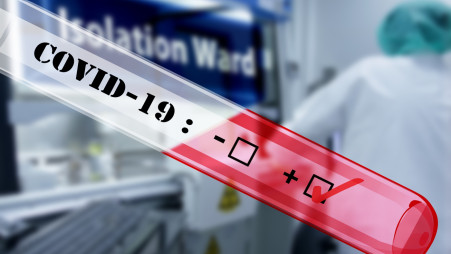

**Initially, the labs tested samples only from those with a travel history to 12 countries designated as high-risk, or those who have come in contact with anyone testing positive for the coronavirus, or showing symptoms as per the government guidelines.
Testing for community transmission began on 15 March. 65 laboratories of the Department of Health Research and the Indian Council of Medical Research (DHR-ICMR) have started testing random samples of people who exhibit flu-like symptoms and samples from patients without any travel history or contact with infected persons.**

**How well equiped is each state in this fight againt COVID-19 in INDIA**

In [ ]:
df_hospitals['Hospitals']=df_hospitals['NumSubDistrictHospitals_HMIS']+df_hospitals['NumRuralHospitals_NHP18']+df_hospitals['NumDistrictHospitals_HMIS'] + df_hospitals['NumUrbanHospitals_NHP18']
df_hospitals['Beds'] = df_hospitals['NumPublicBeds_HMIS']+df_hospitals['NumRuralBeds_NHP18']+df_hospitals['NumUrbanBeds_NHP18']
df_hospitals.drop(['NumSubDistrictHospitals_HMIS','NumRuralHospitals_NHP18','NumDistrictHospitals_HMIS','NumUrbanHospitals_NHP18','NumPublicBeds_HMIS','NumRuralBeds_NHP18','NumUrbanBeds_NHP18'],axis=1,inplace=True)
df_hospitals.head()             
df_hospitals.rename(columns = {'NumPrimaryHealthCenters_HMIS':'Primary Health Centers','NumCommunityHealthCenters_HMIS':'Community Health Centers','TotalPublicHealthFacilities_HMIS':'Other Public Facilities'}, inplace = True) 




In [ ]:

df_hospitals.dropna()
df_hospitals['Total']=df_hospitals['Primary Health Centers']+df_hospitals['Community Health Centers']+df_hospitals['Other Public Facilities']+df_hospitals['Hospitals']+df_hospitals['Beds']

In [ ]:
df_hospitals= df_hospitals.sort_values('Total', ascending=False)
df_hospitals=df_hospitals[0:36]
df_hospitals.style.background_gradient(cmap='Purples', subset='Hospitals')\
    .background_gradient(cmap='Greens', subset='Beds')\
    .background_gradient(cmap='BuPu', subset='Primary Health Centers')\
    .background_gradient(cmap='Reds', subset='Community Health Centers')\
    .background_gradient(cmap='PuBuGn', subset='Other Public Facilities')\
    .background_gradient(cmap='YlOrBr', subset='Total') 

In [ ]:
df_census.rename(columns={
    "State / Union Territory": "state",
    "Population": "population",
    "Urban population": "urban_population",
    "Gender Ratio": "gender_ratio"}, inplace = True)

df_census['Area']= df_census.Area.astype(str).str.replace(",","").str.split("km").str[0].astype(int)

df_state = df_labs.groupby('state')['lab'].count().reset_index().rename(columns={'lab':'labs'}).merge(df_census, on ='state')
df_state['people_per_lab'] = df_state.population/df_state.labs
df_state['area_per_lab'] = df_state.Area /df_state.labs

df_state_lab = pd.pivot_table(df_labs, values ='lab', index = 'state', columns='type',aggfunc='count', fill_value=0).reset_index()
df_state_lab['labs']= df_state_lab.sum(axis=1)
df_state_lab=df_state_lab.sort_values('labs', ascending=False).head(10)

df_city_lab = pd.pivot_table(df_labs, values ='lab', index = 'city', columns='type',aggfunc='count', fill_value=0).reset_index()
df_city_lab['labs']= df_city_lab.sum(axis=1)
df_city_lab=df_city_lab.sort_values('labs', ascending=False).head(10)

**HOW MANY TESTING EQUIPMENTS AND LABS ARE AVAILABLE FOR EACH STATE**

In [ ]:
source_1 = {
    "state": df_state_lab.state.values,
    "Government Laboratory": df_state_lab["Government Laboratory"].values,
    "Private Laboratory": df_state_lab["Private Laboratory"].values,
    "Collection Site": df_state_lab["Collection Site"].values
}

types = ["Government Laboratory", "Private Laboratory", "Collection Site"]

v1 = figure(plot_width = 400, plot_height = 400, x_range = source_1["state"], title = "Top States with Testing Laboratories")
v1.vbar_stack(types, x = "state", width = 0.81, color = ['yellow','blue','red'], source = source_1, legend_label = types)
v1.xaxis.major_label_orientation = pi / 6
v1.legend.label_text_font_size = "5pt"

source_2 = {
    "city": df_city_lab.city.values,
    "Government Laboratory": df_city_lab["Government Laboratory"].values,
    "Private Laboratory": df_city_lab["Private Laboratory"].values,
    "Collection Site": df_city_lab["Collection Site"].values
}

v2 = figure(plot_width = 400, plot_height = 400, x_range = source_2["city"], title = "Top Cities with Testing Laboratories")
v2.vbar_stack(types, x = "city", width = 0.81, color = ['yellow','blue','red'], source = source_2, legend_label = types)
v2.xaxis.major_label_orientation = pi / 6
v2.legend.label_text_font_size = "5pt"

source_3 = ColumnDataSource(data = dict(
    state = df_state.state.values,
    labs = df_state.labs.values,
    people_per_lab = df_state.people_per_lab.values / 1000000,
    area_per_lab = df_state.area_per_lab.values / 1000
))

tooltips_3 = [
    ("State", "@state"),
    ("Labs", "@labs"),
    ("People per Lab", "@people_per_lab{0.00} M"),
    ("Area per Lab", "@area_per_lab{0.00} K")
]

h_mid = max(df_state.area_per_lab.values / 1000) / 2
v_mid = max(df_state.people_per_lab.values / 1000000) / 2

source_labels = ColumnDataSource(data = dict(
    state = df_state[(df_state.people_per_lab >= v_mid * 1000000) | (df_state.area_per_lab >= h_mid * 1000)].state.values,
    people_per_lab = df_state[(df_state.people_per_lab >= v_mid * 1000000) | (df_state.area_per_lab >= h_mid * 1000)].people_per_lab.values / 1000000,
    area_per_lab = df_state[(df_state.people_per_lab >= v_mid * 1000000) | (df_state.area_per_lab >= h_mid * 1000)].area_per_lab.values / 1000
))

labels = LabelSet(x = "people_per_lab", y = "area_per_lab", text = "state", source = source_labels, level = "glyph", x_offset = -19, y_offset = -23, render_mode = "canvas")

v3 = figure(plot_width = 600, plot_height = 600, tooltips = tooltips_3, title = "People and Area per Lab by State")
v3.circle("people_per_lab", "area_per_lab", source = source_3, size = 13, color = "red", alpha = 0.41)

tl_box = BoxAnnotation(right = v_mid, bottom = h_mid, fill_alpha = 0.1, fill_color = "blue")
tr_box = BoxAnnotation(left = v_mid, bottom = h_mid, fill_alpha = 0.1, fill_color = "green")
bl_box = BoxAnnotation(right = v_mid, top = h_mid, fill_alpha = 0.1, fill_color = "pink")
br_box = BoxAnnotation(left = v_mid, top = h_mid, fill_alpha = 0.1, fill_color = "yellow")

v3.add_layout(tl_box)
v3.add_layout(tr_box)
v3.add_layout(bl_box)
v3.add_layout(br_box)

v3.add_layout(labels)

v3.xaxis.axis_label = "People per Lab (in Million)"
v3.yaxis.axis_label = "Area per Lab (in Thousand sq km)"

show(row(v1, v2))

**Tamilnadu having a number of cases is doing well in terms of medical arrangements and testing whereas several other states topping the charts for highest number of confirmed cases are not so well equipped in this fight against covid-19. States like Maharashtra and Indian Capital New Delhi need to gear up their speed for testing and providing medical support to their patients.**

**TIMELINE FOR TESTING PERFORMED**

In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2026973" data-url="https://flo.uri.sh/visualisation/2026973/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
show(v3)

1. The *up-left* quadrant indicate that the states does not have ample number of labs as per the area distribution. Hence, having a test will 
2. The *up-right* quadrant indicate states having large  area as well as high number of labs per. They are badly affected by the virus but are well equipped to fight it.be much difficult for the people residing in states under this quadrant. 
3. The *bottom-right* quadrant indicate states with high population per lab. Carrying out rapid testing in states under this quadrant can be cumbersome.
4. The *bottom-left* quadrant indicate states having low area as well as small number of lab. As for now they are going good but if these states are hit by large number of cases then testing them will be difficult. 

# FUTURE PREDICTIONS VIA VARIOUS LEARNING MODELS

**Predicting the number of cases for coming days can help the authorities and individuals to setup their plans for the future. It can give a rough idea about whether the situation is going to improve or the massive 1.3 billion population still have to practise work from home for few more weeks.**



In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_30, india_total_cases, test_size=0.15, shuffle=False) 


**FUTURE PREDICTIONS USING SUPPORT VECTOR MACHINE**

In [ ]:
# SUPPORT VECTOR REGRESSOR
'''c = [0.01, 0.1,0.2,0.5, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
degree = [3, 4, 5, 6, 7]
svm = SVR(kernel='poly')
svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

svm = SVR(kernel='poly')
svm_confirmed = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=5, verbose=1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)'''
# Above code if for finding best parametters and can take long time w.r.t size of dataset.

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=9, C=0.00001)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

In [ ]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
# mean squared and absolute error
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))


In [ ]:
# FUTURE PREDICTION TABLE SVM
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
svm_df = pd.DataFrame({'Date': future_forecast_dates[-11:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-11:])})
print(svm_df)
df_future_predictions['Dates'] = future_forecast_dates[-11:]
df_future_predictions['SVR Predcitions'] = np.round(svm_pred[-11:])
df_MSE['SVR']=mean_squared_error(svm_test_pred, y_test_confirmed)

In [ ]:
# SVM PLOT (ORIGNAL VS PREDICTED) VALUE
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_total_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='red')
plt.title('Number of Covid Cases Over Time', size=30)
plt.xlabel('Since 1/30/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**FUTURE PREDICTIONS USING POLYNOMIAL REGRESSION**

In [ ]:
#POLYNOMIAL REGRESSION
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

In [ ]:
#FUTURE PREDICTION TABLE
print(linear_model.coef_)

plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

linear_pred = linear_pred.reshape(1,-1)[0]
Linear_reg_future = pd.DataFrame({'Date': future_forecast_dates[-11:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-11:])})
print(Linear_reg_future)
df_future_predictions['Polynomial Regression'] = np.round(linear_pred[-11:])


In [ ]:
# POLYNOMIAL REGRESSION (ORGINAL VS FUTURE)PLOT
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**FUTURE PREDICTIONS USING BAYESIAN RIDGE**

In [ ]:
#BAYESIAN RIDGE
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [ ]:
#FUTURE PREDICTIONS
Bayesian_future_df = pd.DataFrame({'Date': future_forecast_dates[-11:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-11:])})
print(Bayesian_future_df)
df_future_predictions['Bayesian Ridge'] = np.round(bayesian_pred[-11:])

In [ ]:
#BAYESIAN RIDGE (ORGINAL VS FUTURE) PLOT
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.plot(future_forecast, bayesian_pred, linestyle='dashed', color='red')
plt.title('Number of Covid Cases Over Time', size=30)
plt.xlabel('Since 01/30/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


**RESULT COMPARISION *SVM VS POLYNOMIAL REGRESSION VS BAYESIAN RIDGE***

In [ ]:
print(df_future_predictions)


**FITTING AUTOREGRESSION MODEL**

In [ ]:
Confirmed_series = data_frame_vertical['Confirmed']
Confirmed_series
Confirmed_series =np.log(Confirmed_series)
plt.plot(Confirmed_series)
plt.title(" log (Confirmed Cases )")
plt.show()

In [ ]:
#AUTO CORRELATION
acf_confirmed = acf(Confirmed_series)[1:20]
acf_df =pd.DataFrame([acf_confirmed]).T # test_df=acf_df
acf_df.columns = ['AutoCorrelation']
acf_df.index +=1
acf_df.plot(kind='bar', color='red')
plt.show()


#PARTIAL AUTOCORRELATION FUNCTION
pacf_confirmed = pacf(Confirmed_series)[1:20]
pacf_df = pd.DataFrame([pacf_confirmed]).T
pacf_df.columns = ['Partial AutoCorrelation']
pacf_df.index +=1
pacf_df.plot(kind='bar')
plt.show()

In [ ]:
Confirmed_series_diff = Confirmed_series-Confirmed_series.shift()
plt.plot(Confirmed_series_diff)
plt.title("Shifted Series")
plt.show()

diff = Confirmed_series_diff.dropna()
acf_diff = acf(diff)[1:30]
acf_df = pd.DataFrame([acf_diff]).T
acf_df.columns = ['First Difference Autocorrelation']
acf_df.index +=1
acf_df.plot(kind='bar')
pacf_diff = pacf(diff)[1:30]
plt.plot(pacf_diff)
plt.show()

acf_df = pd.DataFrame([pacf_diff]).T
acf_df.columns = ['First Difference Partial Autocorrelation']
acf_df.index +=1
acf_df.plot(kind='bar')
plt.show()

In [ ]:
# AUTOREGRESSIVE  MODEL (AR)

X_train = arima_df.iloc[0:78]
X_train=X_train['Confirmed']
valid= arima_df.iloc[78:]
y_pred=valid.copy()
#X_train = data_frame_vertical[0:70]
#AR_prediction=[]
AR_model = AR(X_train)
AR_model_fit = AR_model.fit()
print(AR_model_fit.aic)
AR_prediction = AR_model_fit.predict(start=70,end=80)
plt.plot(AR_prediction,color='red')
plt.plot(data_frame_vertical[70:])
plt.ylim(2500,18000)
plt.legend(["AR MODEL PREDICTIONS","ACTUAL CASES"])


# **IS COVID-19 THE ONLY EPIDEMIC THAT HUMANS HAVE ENCOUNTERED ?**

Well it is not the case that the homo sapiens have encountered an epidemic for the first time. Covid-19 just marks the return of a very old – and familiar – enemy. Throughout history, nothing has killed more human beings than the viruses, bacteria and parasites that cause disease. Not natural disasters like earthquakes or volcanoes. Not war – not even close. Here is a breif insight on some of the most deadliest pandemic spreads of all time other than covid-19:

# 1. **EBOLA virus**
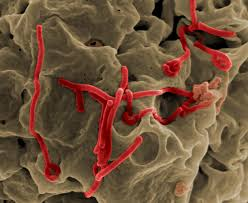

In 1976, Ebola (named after the Ebola River in Zaire) first emerged in Sudan and Zaire. The first outbreak of Ebola (Ebola-Sudan) infected over 284 people, with a mortality rate of 53%. The 2014–2016 outbreak in West Africa was the largest and most complex Ebola outbreak since the virus was first discovered in 1976, which resulted in at least 28,646 suspected cases and 11,323 confirmed deaths.
In December 2016, a study found the **VSV-EBOV** vaccine to be 70–100% effective against the Ebola virus, making it the first vaccine against the disease.**VSV-EBOV** was approved by the U.S. Food and Drug Administration in December 2019.



# 2. **SARS VIRUS**
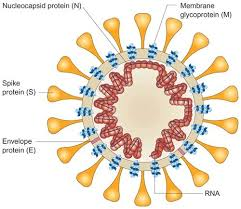

Severe acute respiratory syndrome (SARS) is a viral respiratory disease of zoonotic origin that surfaced in the early 2000s caused by severe acute respiratory syndrome coronavirus (SARS-CoV or SARS-CoV-1). The syndrome caused the 2002–2004 SARS outbreak. In 2019, a related virus strain, severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), was discovered. This new strain causes COVID-19, a disease which brought about the ongoing 2019–20 coronavirus pandemic.
Fortunately, No cases of the first SARS-CoV have been reported worldwide since 2004


# 3. **ZIKA VIRUS**
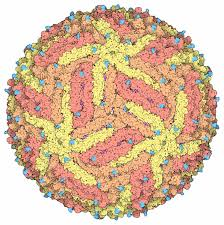

The rise in the spread of Zika virus has been accompanied by a rise in cases of microcephaly and Guillain-Barré syndrome. First identified in Uganda in 1947 in monkeys, Zika was later identified in humans in 1952. The first large outbreak of disease caused by Zika infection was reported from the Island of Yap in 2007. There are currently several countries experiencing Zika virus outbreaks.
As of March 2016, 18 companies and institutions were developing vaccines against Zika, but they state a vaccine is unlikely to be widely available for about 10 years.


# 4. **SWINE FLU**
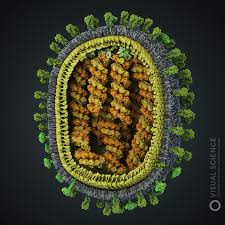

*"Influenza A virus subtype H1N1 (A/H1N1)"* is the subtype of Influenza A virus that was the most common cause of human influenza (flu) in 2009, and is associated with the 1918 Spanish flu outbreak. In June 2009, the World Health Organization (WHO) declared the new strain of swine-origin H1N1 as a pandemic. 
With a mortality rate of 0.96 the swine flu had around 6.7 million cases until 2019 and caused 19654 deaths.
The vaccine developed for H1N1 appeared both effective and safe,providing a strong protective immune response and having similar safety profile to the usual seasonal influenza vaccine.


In [ ]:
epidemic_cases = pd.DataFrame({
    'Pandemic' : ['COVID-19', 'SARS', 'EBOLA', 'ZIKA', 'H1N1'],
    'YEAR DISCOVERED(peak)' : [2019, 2003, 2014, 1947, 2009],
    'Confirmed Cases' : [2416135, 8432, 28642, 58492, 6724149],
    'FATALITIES' : [165939, 813, 11319, 11343, 19654],
    'Countries Affected' : [210, 31, 10, 42, 178]
})

epidemic_cases['Mortality Rate'] = round((epidemic_cases['FATALITIES']/epidemic_cases['Confirmed Cases'])*100, 2)
epidemic_cases.head()

In [ ]:
fig = px.bar(epidemic_cases.sort_values('FATALITIES',ascending=False), 
             y="FATALITIES", x="Pandemic", color='Pandemic', 
             text='FATALITIES', orientation='v', title='Deaths caused by each Pandemic',
             #color='rgb(204,204, 205)'
            )
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=10)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [ ]:
fig = px.bar(epidemic_cases.sort_values('Countries Affected', ascending=False),
             y="Pandemic", x="Countries Affected", color='Pandemic', 
             text='Countries Affected', orientation='h', title='Total Countries Affected', 
             range_x=[0,200])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=10)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
fig.show()

**NUMBER OF CONFIRMED CASES THAT WERE REPORTED FOR DIFFERRENT PANDEMICS WHEN THEY WERE AT THEIR PEAK (Time span considered = 90 days)**

In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2024423" data-url="https://flo.uri.sh/visualisation/2024423/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# CONCLUSION
With affecting more than 210 countries, Covid-19 currently have around 2.4 million cases worldwide. The precition via different machine learning models also support the argument that in the coming days the number of cases are likely to increase. There are very slight chances that INDIA may drift toward community spread but is the 3 week extension to the world's largest lockdown enough to stop the spread ?

Analysis and comparision with other pandemics shows that pandemics does not stay at their peak for much long but history also ponders light upon the fact that deleoping a effective vaccine for such pandemics is not an easy task. Fortunately every pandemic that attacked the human race was eventually washed out but we had to a price for that. So for the NOVEL COVID-19 the question that remains unanswered is-

# **Are we any close in developing a vaccine for the virus or we just hope that the upcoming generation will automatically develop immunity against it as they land in this biological warfare ? **